In [3]:
import pylab as plt
import numpy as np
from matplotlib import gridspec
import math
 
def rec_plot(s, eps=None, steps=None):
    
    """
    Função para plotar gráficos de recorrência
    """
    
    if eps==None: eps=0.01
    if steps==None: steps=10
    N = s.size
    S = np.repeat(s[None,:], N, axis=0)
    Z = np.floor(np.abs(S-S.T)/eps)
    Z[Z>steps] = steps
 
    return Z[::-1,:]

def rec_plot_pb(s, eps=None, steps=None):
    if eps==None: eps=0.1
    N = s.size
    S = np.repeat(s[None,:], N, axis=0)
    Z = np.abs(S-S.T) > eps
     
    return Z[::-1,:]

def plot_graph(s, f=rec_plot, eps=None, steps=None):
    fig = plt.figure(figsize=(10, 14)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 4]) 
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax1.plot(s)
    ax2.imshow(f(s, eps=eps, steps=steps), cmap='gray')
    plt.show()
    

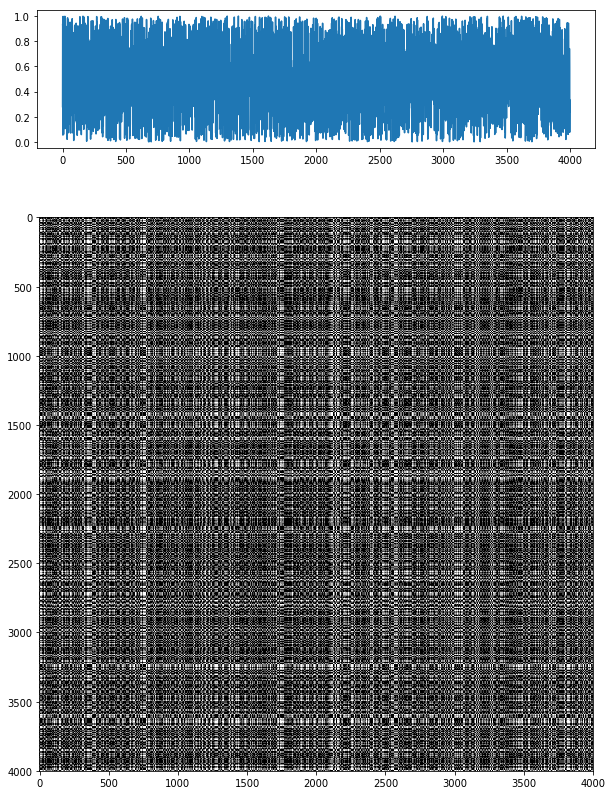

In [31]:
%matplotlib inline

uniform = np.random.random(4000)
plot_graph(uniform, rec_plot, eps=0.2, steps=5)

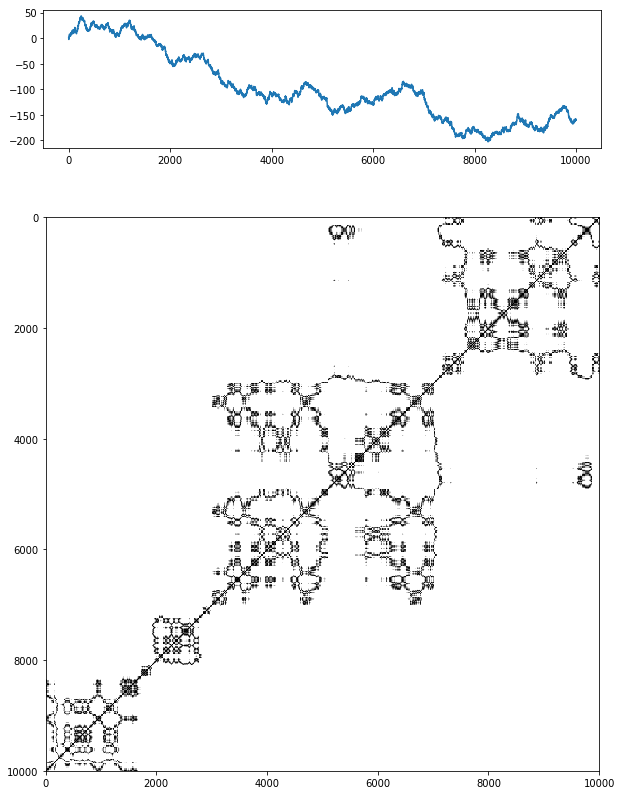

In [32]:
brownian = np.cumsum(np.random.normal(0,1,10000))
plot_graph(brownian, rec_plot, eps=0.3, steps=20)

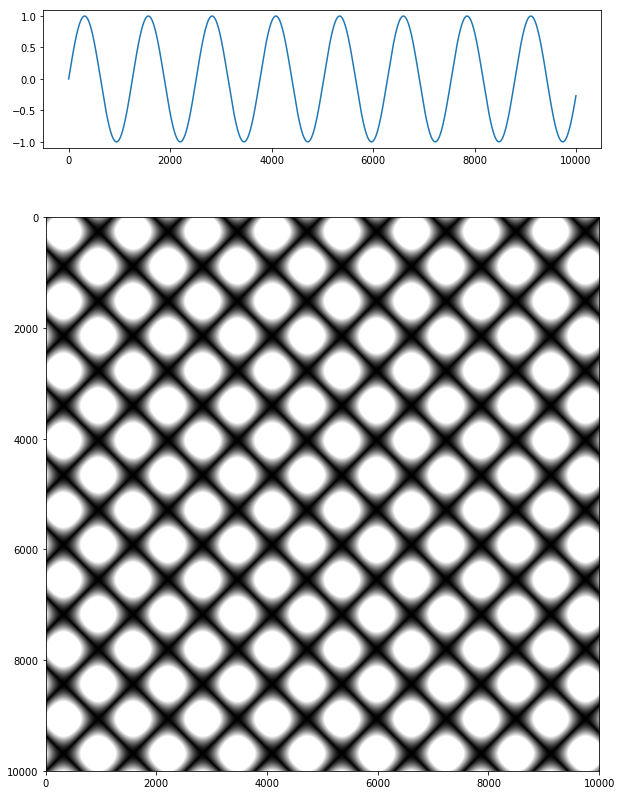

In [26]:
sin = np.sin(np.arange(0,50,0.005))
plot_graph(sin, rec_plot, eps=0.01, steps=100)

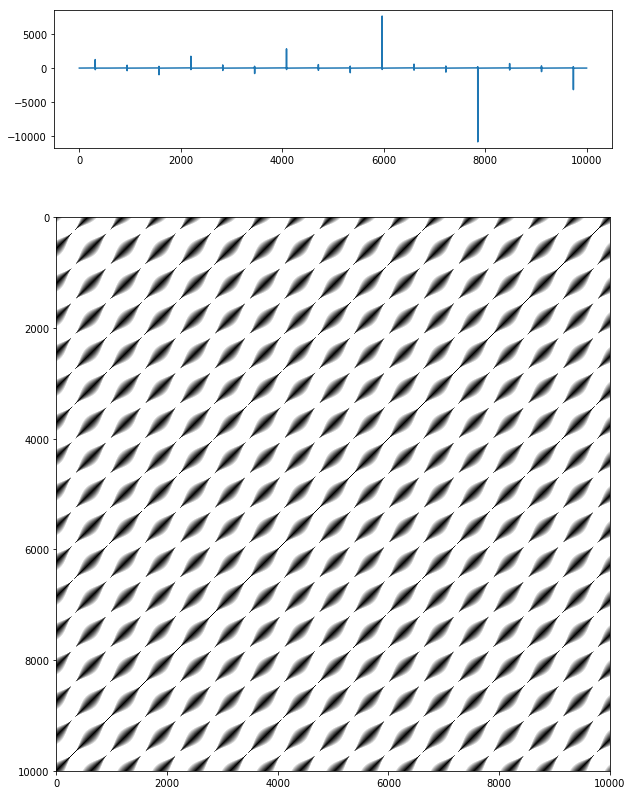

In [27]:
tan = np.tan(np.arange(0,50,0.005))
plot_graph(tan, rec_plot, eps=0.01, steps=100)

In [7]:
def f(x, r=4, c=0.01, i=0):
    return r * x * (1 - x) + (c * i)

def log_map(x0=0.49, r=4, c=0.01, n=1):
    x = x0
    
    serie = []
    for i in range(n):
        serie.append(x + c * i)
        x = f(x)
    return serie

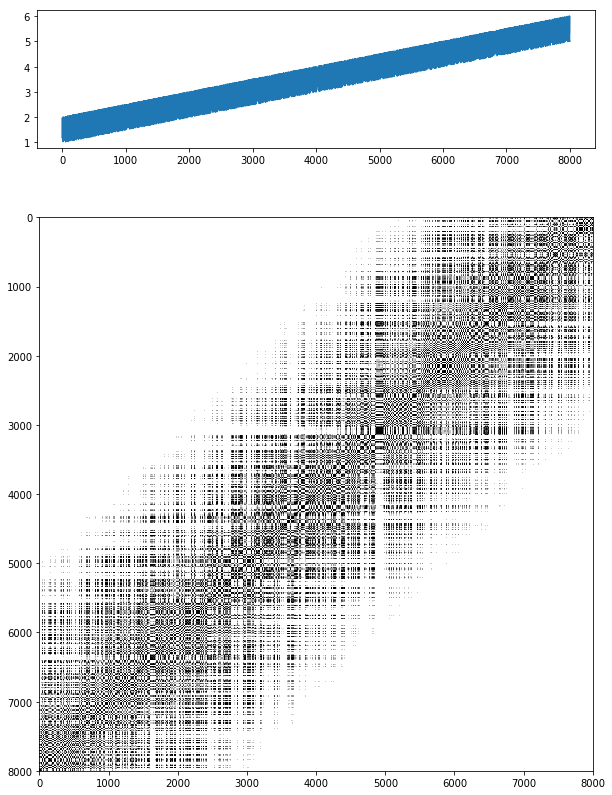

In [30]:
logistic = np.array(log_map(0.49, r=4, n=10000, c=0.0005))
plot_graph(logistic[2000:], rec_plot, eps=0.1, steps=5)